# 使用多种线性回归模型对人脸进行预测

olivetti_faces 是 olivetti研究所提供的人脸数据集

olivetti研究所 英文 olivetti research laboratory 是英国剑桥大学和AT&T合办的计算机和通信领域的研究所

需求：LAPD的SWAT在处理暴力犯罪的过程中发现，抢匪在行凶过程中经常会蒙面，但是一般还是会把上半张脸露出来。我们通过分析知道，下半张脸和上半张脸实际上是有联系的。那么能否通过人工智能，把蒙面劫匪的下半张脸预测出来，然后对其进行通缉呢？


In [2]:
# 使用不同的回归模型对人脸进行预测 线性回归 岭回归 拉索回归
from sklearn.datasets import fetch_olivetti_faces
from sklearn.linear_model import LinearRegression,Ridge,Lasso

import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [4]:
faces = fetch_olivetti_faces()  # 第一次要从网上下载 以后就可以直接从本地加载了

In [7]:
data = faces.data
images = faces.images
target = faces.target

In [8]:
# data数据量很大 不要直接打印出来查看 会卡死的
data.shape  # 400个样本 里面的数据是 对应的图片扁平化后的数据（就可以直接用了）

(400, 4096)

In [9]:
faces.images.shape  # 400个样本（图片） 每个图片64*64

(400, 64, 64)

In [10]:
target  # 40个人 每个人10个图片

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

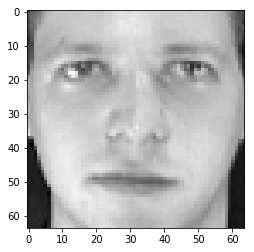

In [19]:
plt.imshow(images[0],cmap='gray')

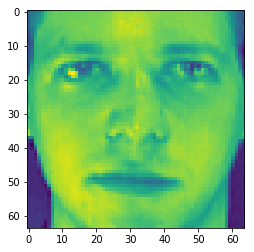

In [21]:
plt.imshow(data[0].reshape(64,64))

In [22]:
# 每个人的前9个作为训练数据 最后一个用来测试
# 上半张脸 是 特征值 下半张脸 是 目标值
X_train = []  # 训练集的特征值
y_train = []  # 训练集的目标值
X_test = []  # 测试集的特征值
y_test = []  # 测试集的真实结果

index = 0  # 用来记录 读取的图片的索引的 变量
# 遍历data分开训练集和测试集
for i in range(40):
    # 40个人
    for j in range(10):
        # 每个人10张图
        # data[index]  # 取出来的是每一个图片 扁平化后的数据
        face_data = data[index]
        up_face = face_data[:2048]  # 上半张脸
        down_face = face_data[2048:]  # 下半张脸
        # 每个人的图片 0-9 一个10个 <9的用来训练 =9的留着测试
        if j<9:
            X_train.append(up_face)  # 作为训练集的特征
            y_train.append(down_face)  # 作为训练集的结果
        else:
            X_test.append(up_face)  # 作为测试集的特征值
            y_test.append(down_face)  # 作为测试集的真实结果
        index += 1

In [23]:
# 获取模型 训练模型
lr = LinearRegression()
rr = Ridge()
lasso = Lasso()

In [24]:
lr.fit(X_train,y_train)
rr.fit(X_train,y_train)
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
# 预测一下 试试
y_lr_ = lr.predict(X_test)
y_rr_ = rr.predict(X_test)
y_lasso_ = lasso.predict(X_test)

In [28]:
X_test[0].shape  # 上半张脸 32*64

(2048,)

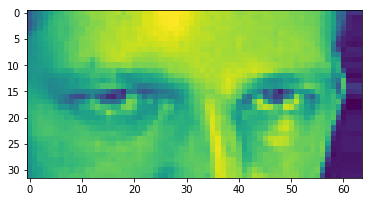

In [29]:
# 随便挑选一个先看看
plt.imshow(X_test[0].reshape(32,64))

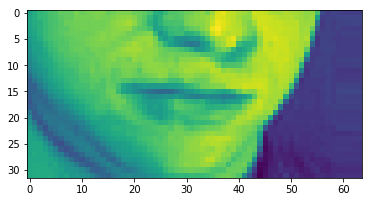

In [31]:
plt.imshow(y_test[0].reshape(32,64))

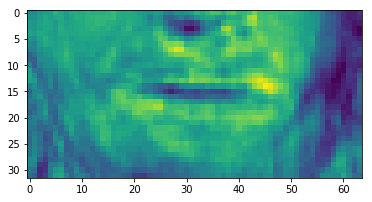

In [32]:
plt.imshow(y_lr_[0].reshape(32,64))

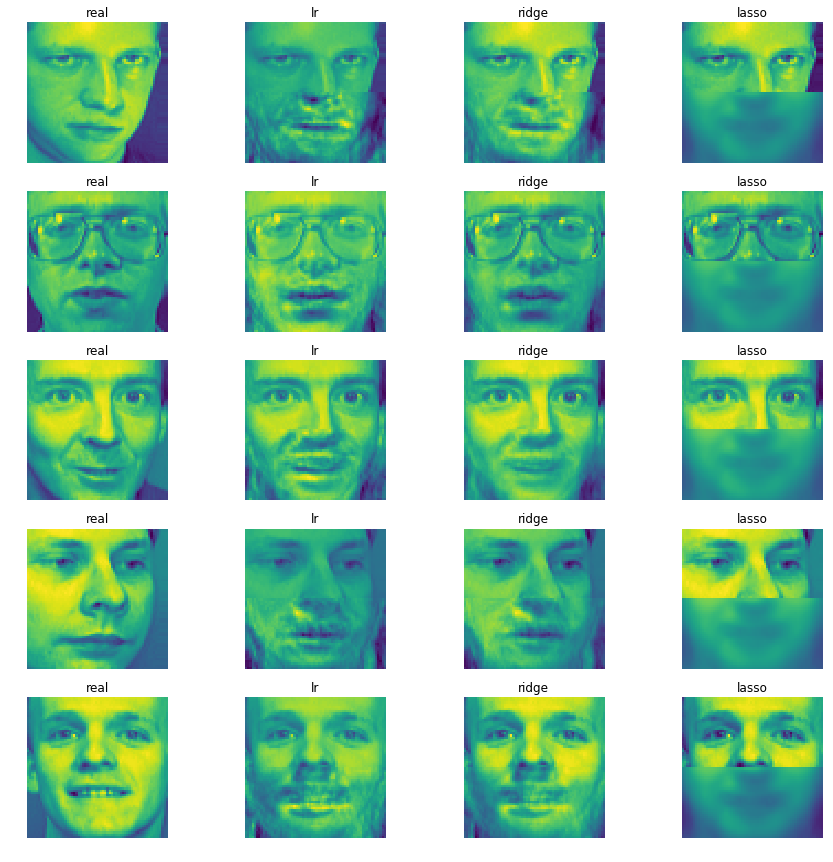

In [42]:
# 取出5个人 把 这是结果 lr rr lasso 的结果对比一下

# 5个人是5行 4种算法的展示是4列 5行4列
plt.figure(figsize=(15,15))
for i in range(5):
    # 每一个人 真实的上半张脸
    up_face = X_test[i]
    # 每一个人 真实的下半张脸
    down_face = y_test[i]
    # 拼合多维数组
    face = np.concatenate((up_face,down_face))
    # 创建子画布
    axes1 = plt.subplot(5,4,i*4+1)  # 占用哪个子画布一会儿再分析
    # 往对应的子画布中画脸
    plt.imshow(face.reshape(64,64))
    axes1.axis('off')
    axes1.set_title('real')
    # lr的 效果
    up_face = X_test[i]
    # 每一个人 通过普通线性回归预测的下半张脸
    down_face = y_lr_[i]
    # 拼合多维数组
    face = np.concatenate((up_face,down_face))
    # 创建子画布
    axes2 = plt.subplot(5,4,i*4+2)  # 占用哪个子画布一会儿再分析
    # 往对应的子画布中画脸
    plt.imshow(face.reshape(64,64))
    axes2.axis('off')
    axes2.set_title('lr')
    # rr的 效果
    up_face = X_test[i]
    down_face = y_rr_[i]
    face = np.concatenate((up_face,down_face))
    axes3 = plt.subplot(5,4,i*4+3)
    plt.imshow(face.reshape(64,64))
    axes3.axis('off')
    axes3.set_title('ridge')
    # lasso的 效果
    up_face = X_test[i]
    down_face = y_lasso_[i]
    face = np.concatenate((up_face,down_face))
    axes4 = plt.subplot(5,4,i*4+4)
    plt.imshow(face.reshape(64,64))
    axes4.axis('off')
    axes4.set_title('lasso')
    
    
